In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [4]:
xml_data = """
<students>
  <student SID="1">
    <firstName>Sandy</firstName>
    <lastName>Guillaumeau</lastName>
    <date>1988-04-09</date>
  </student>
  <student SID=“2">
    <firstName>Quentin</firstName>
    <lastName>Decayeux</lastName>
    <date>1990-02-01</date>
  </student>
</students>
"""

In [5]:
# Parse the XML
root = ET.fromstring(xml_data)

ParseError: not well-formed (invalid token): line 8, column 15 (<string>)

In [ ]:
data = []
for customer in root.findall('Customer'):
    customer_id = customer.find('CustomerID').text
    customer_name = customer.find('Name').text
    customer_email = customer.find('Email').text
    for order in customer.findall('.//Order'):
        order_id = order.find('OrderID').text
        order_date = order.find('OrderDate').text
        for item in order.findall('.//Item'):
            product_id = item.find('ProductID').text
            product_name = item.find('ProductName').text
            price = float(item.find('Price').text)
            quantity = int(item.find('Quantity').text)
            total_price = price * quantity
            data.append([customer_id, customer_name, customer_email, order_id, order_date, product_id, product_name, price, quantity, total_price])



In [ ]:
# Create a DataFrame
df = pd.DataFrame(data, columns=['CustomerID', 'CustomerName', 'CustomerEmail', 'OrderID', 'OrderDate', 'ProductID', 'ProductName', 'Price', 'Quantity', 'TotalPrice'])
df

,CustomerID,CustomerName,CustomerEmail,OrderID,OrderDate,ProductID,ProductName,Price,Quantity,TotalPrice
0,001,John Doe,johndoe@example.com,1001,2025-01-01,P001,Laptop,1200.0,1,1200.0
1,001,John Doe,johndoe@example.com,1001,2025-01-01,P002,Mouse,25.0,2,50.0
2,001,John Doe,johndoe@example.com,1002,2025-01-05,P003,Monitor,300.0,1,300.0
3,002,Jane Smith,janesmith@example.com,1003,2025-01-07,P004,Tablet,500.0,1,500.0


In [ ]:
# Task 2: Calculate total revenue per customer
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_revenue.columns = ['CustomerID', 'TotalRevenue']
customer_revenue

,CustomerID,TotalRevenue
0,001,1550.0
1,002,500.0


In [ ]:
# Task 3: Identify top products by total revenue
product_revenue = df.groupby('ProductName')['TotalPrice'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='TotalPrice', ascending=False)
product_revenue

,ProductName,TotalPrice
0,Laptop,1200.0
3,Tablet,500.0
1,Monitor,300.0
2,Mouse,50.0


In [ ]:
# Top 3 products
top_3_products = product_revenue.head(3)
top_3_products

,ProductName,TotalPrice
0,Laptop,1200.0
3,Tablet,500.0
1,Monitor,300.0


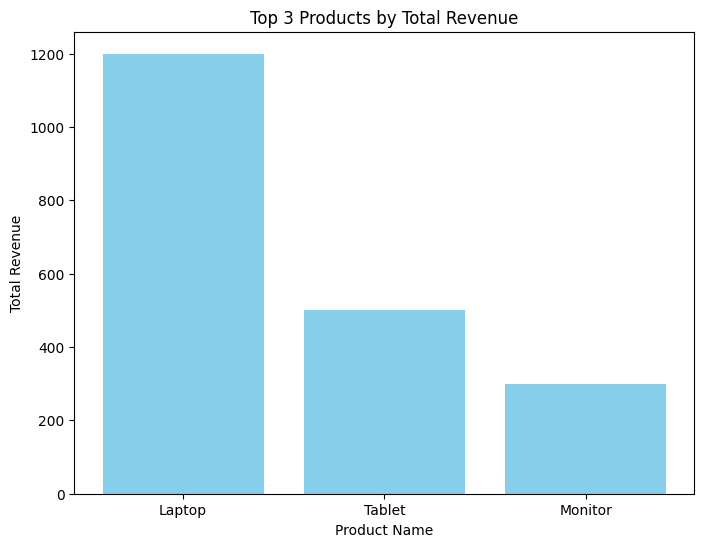

Total Revenue per Customer:
  CustomerID  TotalRevenue
0        001        1550.0
1        002         500.0

Top 3 Products by Total Revenue:
  ProductName  TotalPrice
0      Laptop      1200.0
3      Tablet       500.0
1     Monitor       300.0


In [ ]:
# Task 4: Visualize the top 3 products and their revenues using a bar chart
plt.figure(figsize=(8, 6))
plt.bar(top_3_products['ProductName'], top_3_products['TotalPrice'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 3 Products by Total Revenue')
plt.show()

# Display the results
print("Total Revenue per Customer:")
print(customer_revenue)
print("\nTop 3 Products by Total Revenue:")
print(top_3_products)